In [1]:
COLAB=False #if running on https://colab.research.google.com/notebooks/welcome.ipynb

# Imports

In [2]:
import os
import numpy as np
import pandas as pd
from sys import path
from copy import copy, deepcopy
import warnings
import lightgbm as lgb

warnings.filterwarnings("ignore")

In [3]:
if COLAB == True :
    from google.colab import drive
    drive.mount('/content/drive')
    

## Directories

In [4]:
model_dir = '../sample_code_submission/'
result_dir = '../sample_result_submission/' 
problem_dir = '../ingestion_program/'  
score_dir = '../scoring_program/'
visualizer_dir = '../visualize/'

### Add directories to path

In [5]:
path.append(model_dir) 
path.append(problem_dir)
path.append(score_dir)
path.append("../")
path.append(visualizer_dir)


**Imports**

In [6]:
# from data_loader import get_settings_from_json

from datagen_temp import DataGenerator
from ingestion import Ingestion
from visualise import *

In [7]:
# Init Ingestion
DataGenerator()

ingestion = Ingestion()

# Start timer
ingestion.start_timer()


PRI_lep_pt
PRI_lep_eta
PRI_lep_phi
PRI_electron_flag
PRI_muon_flag
PRI_had_pt
PRI_had_eta
PRI_had_phi
PRI_jet_leading_pt
PRI_jet_leading_eta
PRI_jet_leading_phi
PRI_n_jets
PRI_jet_subleading_pt
PRI_jet_subleading_eta
PRI_jet_subleading_phi
PRI_jet_all_pt
PRI_met
PRI_met_phi
DER_mass_transverse_lep_had
DER_mass_vis
DER_pt_h
DER_deltaeta_jet_jet
DER_mass_jet_jet
DER_prodeta_jet_jet
DER_deltar_lep_had
DER_pt_tot
DER_sum_pt
DER_pt_ratio_lep_had
DER_mass_transverse_met_lep
DER_deltar_had_lep
DER_met_phi_centrality
DER_lep_eta_centrality
[*] --- sum of weights : 2870527.862053714
[*] --- sum of signal : 9666.051853714003
[*] --- sum of background : 2860861.8102
sum of signal 9666.051853714
sum of background 2860861.810200001
Tau energy rescaling : 1.0
mu =  1.065
Shape of test set :  (7245, 32)
sum of signal 10294.345224205412
sum of background 2860861.8102
sum of weights 2871156.1554242056
mu =  1.0649999999999031
Tau energy rescaling : 1.0
mu =  1.6
Shape of test set :  (7245, 32)
sum of s

In [8]:
# load test set
ingestion.load_train_set()

# load test set
ingestion.load_test_sets()


[*] Loading Train data
[*] Loading Test data


## Visualise Data 

In [9]:
Train_data_vis = Dataset_visualise(ingestion.train_set["data"],ingestion.train_set["weights"],ingestion.train_set["labels"],"Train Set")

In [10]:
Train_data_vis.examine_dataset()

[*] --- Dataset name : Train Set
[*] --- List of all features


Index(['PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_electron_flag',
       'PRI_muon_flag', 'PRI_had_pt', 'PRI_had_eta', 'PRI_had_phi',
       'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi',
       'PRI_n_jets', 'PRI_jet_subleading_pt', 'PRI_jet_subleading_eta',
       'PRI_jet_subleading_phi', 'PRI_jet_all_pt', 'PRI_met', 'PRI_met_phi',
       'DER_mass_transverse_lep_had', 'DER_mass_vis', 'DER_pt_h',
       'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet',
       'DER_deltar_lep_had', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_had', 'DER_mass_transverse_met_lep',
       'DER_deltar_had_lep', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality'],
      dtype='object')

[*] --- Examples of all features


,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_electron_flag,PRI_muon_flag,PRI_had_pt,PRI_had_eta,PRI_had_phi,PRI_jet_leading_pt,PRI_jet_leading_eta,...,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_lep_had,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_had,DER_mass_transverse_met_lep,DER_deltar_had_lep,DER_met_phi_centrality,DER_lep_eta_centrality
0,36.6755,-1.940770,-2.753190,1,0,35.4174,-1.223450,0.481035,35.4174,-1.223450,...,55.095877,0.027311,3.132210,41.893847,141.4370,1.035522,15.588278,3.132205,1.411802,0.008104
1,39.0259,0.269495,0.528754,0,1,40.6848,0.745409,-2.706080,40.6848,0.745409,...,116.866057,-1.364963,3.085280,43.432148,149.9205,0.959226,2.407938,3.085278,1.311577,0.671907
2,26.1513,0.764040,-3.042000,0,1,34.3953,2.134360,-0.037032,34.3953,2.134360,...,92.786911,-0.229062,3.302670,30.007417,126.9689,0.760316,3.415386,3.302667,-0.631082,0.951664
3,25.8143,1.123370,-2.154950,0,1,30.9280,1.880660,0.941374,35.6721,1.878980,...,21.554073,3.533723,3.187580,34.092807,123.3424,0.834658,2.554589,3.187587,1.384474,0.000000
4,28.0641,1.811140,2.333520,0,1,65.1540,2.154540,1.433750,98.8498,-1.501280,...,510.101584,-3.234568,0.963072,103.366970,296.1561,0.430735,5.388420,0.963073,1.178580,0.517077


[*] --- Description of all features


,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_electron_flag,PRI_muon_flag,PRI_had_pt,PRI_had_eta,PRI_had_phi,PRI_jet_leading_pt,PRI_jet_leading_eta,...,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_lep_had,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_had,DER_mass_transverse_met_lep,DER_deltar_had_lep,DER_met_phi_centrality,DER_lep_eta_centrality
count,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,...,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000
mean,33.492350,0.003360,-0.004645,0.448732,0.551268,44.375863,0.001941,0.000454,67.863241,0.001060,...,144.349985,-2.659097,2.588520,53.358373,174.176407,0.871310,20.578445,2.588520,0.490729,-2.599927
std,17.812308,1.189483,1.813700,0.497366,0.497366,23.500466,1.218742,1.812504,59.064989,1.558771,...,276.112550,4.268375,0.710706,37.203753,142.298374,0.545948,20.181883,0.710706,1.118832,3.642165
min,20.000200,-2.499850,-3.141570,0.000000,0.000000,22.917500,-2.673120,-3.141570,22.939800,-4.857170,...,-7.000000,-21.902760,0.569976,0.134850,43.374500,0.038801,-0.000000,0.569977,-1.414214,-7.000000
25%,23.826625,-0.900775,-1.579835,0.000000,0.000000,31.012000,-0.939003,-1.573890,35.493500,-1.130220,...,-7.000000,-7.000000,2.153040,33.047344,69.592025,0.547835,5.823195,2.153041,-0.692455,-7.000000
50%,28.659650,-0.000106,-0.001600,0.000000,1.000000,38.721450,0.010557,0.015144,46.579500,0.008617,...,70.897889,-1.898034,2.843445,45.931261,139.425100,0.754090,14.329371,2.843444,1.123689,0.000002
75%,36.420400,0.905549,1.564507,1.000000,1.000000,49.402100,0.938565,1.565438,73.127250,1.129450,...,178.862909,0.479348,3.105927,62.764110,222.095025,1.035205,29.879771,3.105926,1.380367,0.461030
max,434.309000,2.499990,3.141570,1.000000,1.000000,673.323000,2.682640,3.141550,1083.160000,4.908190,...,6865.710623,19.573016,5.777640,1143.009736,2172.097000,12.018159,555.207055,5.777639,1.414214,1.000000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 432x288 with 0 Axes>

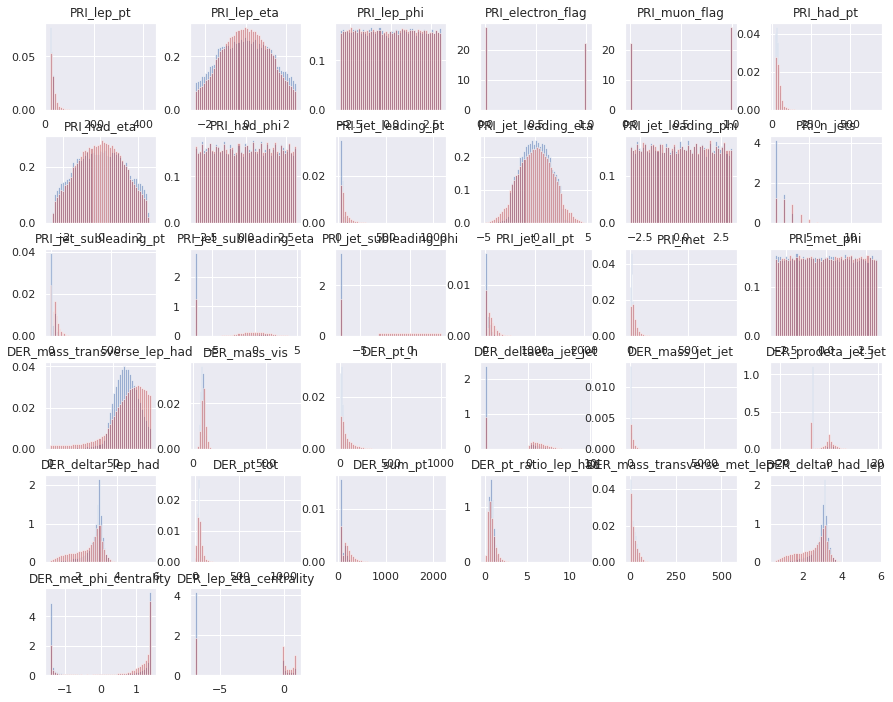

In [11]:
Train_data_vis.histogram_dataset()

Signal feature  correlation matrix


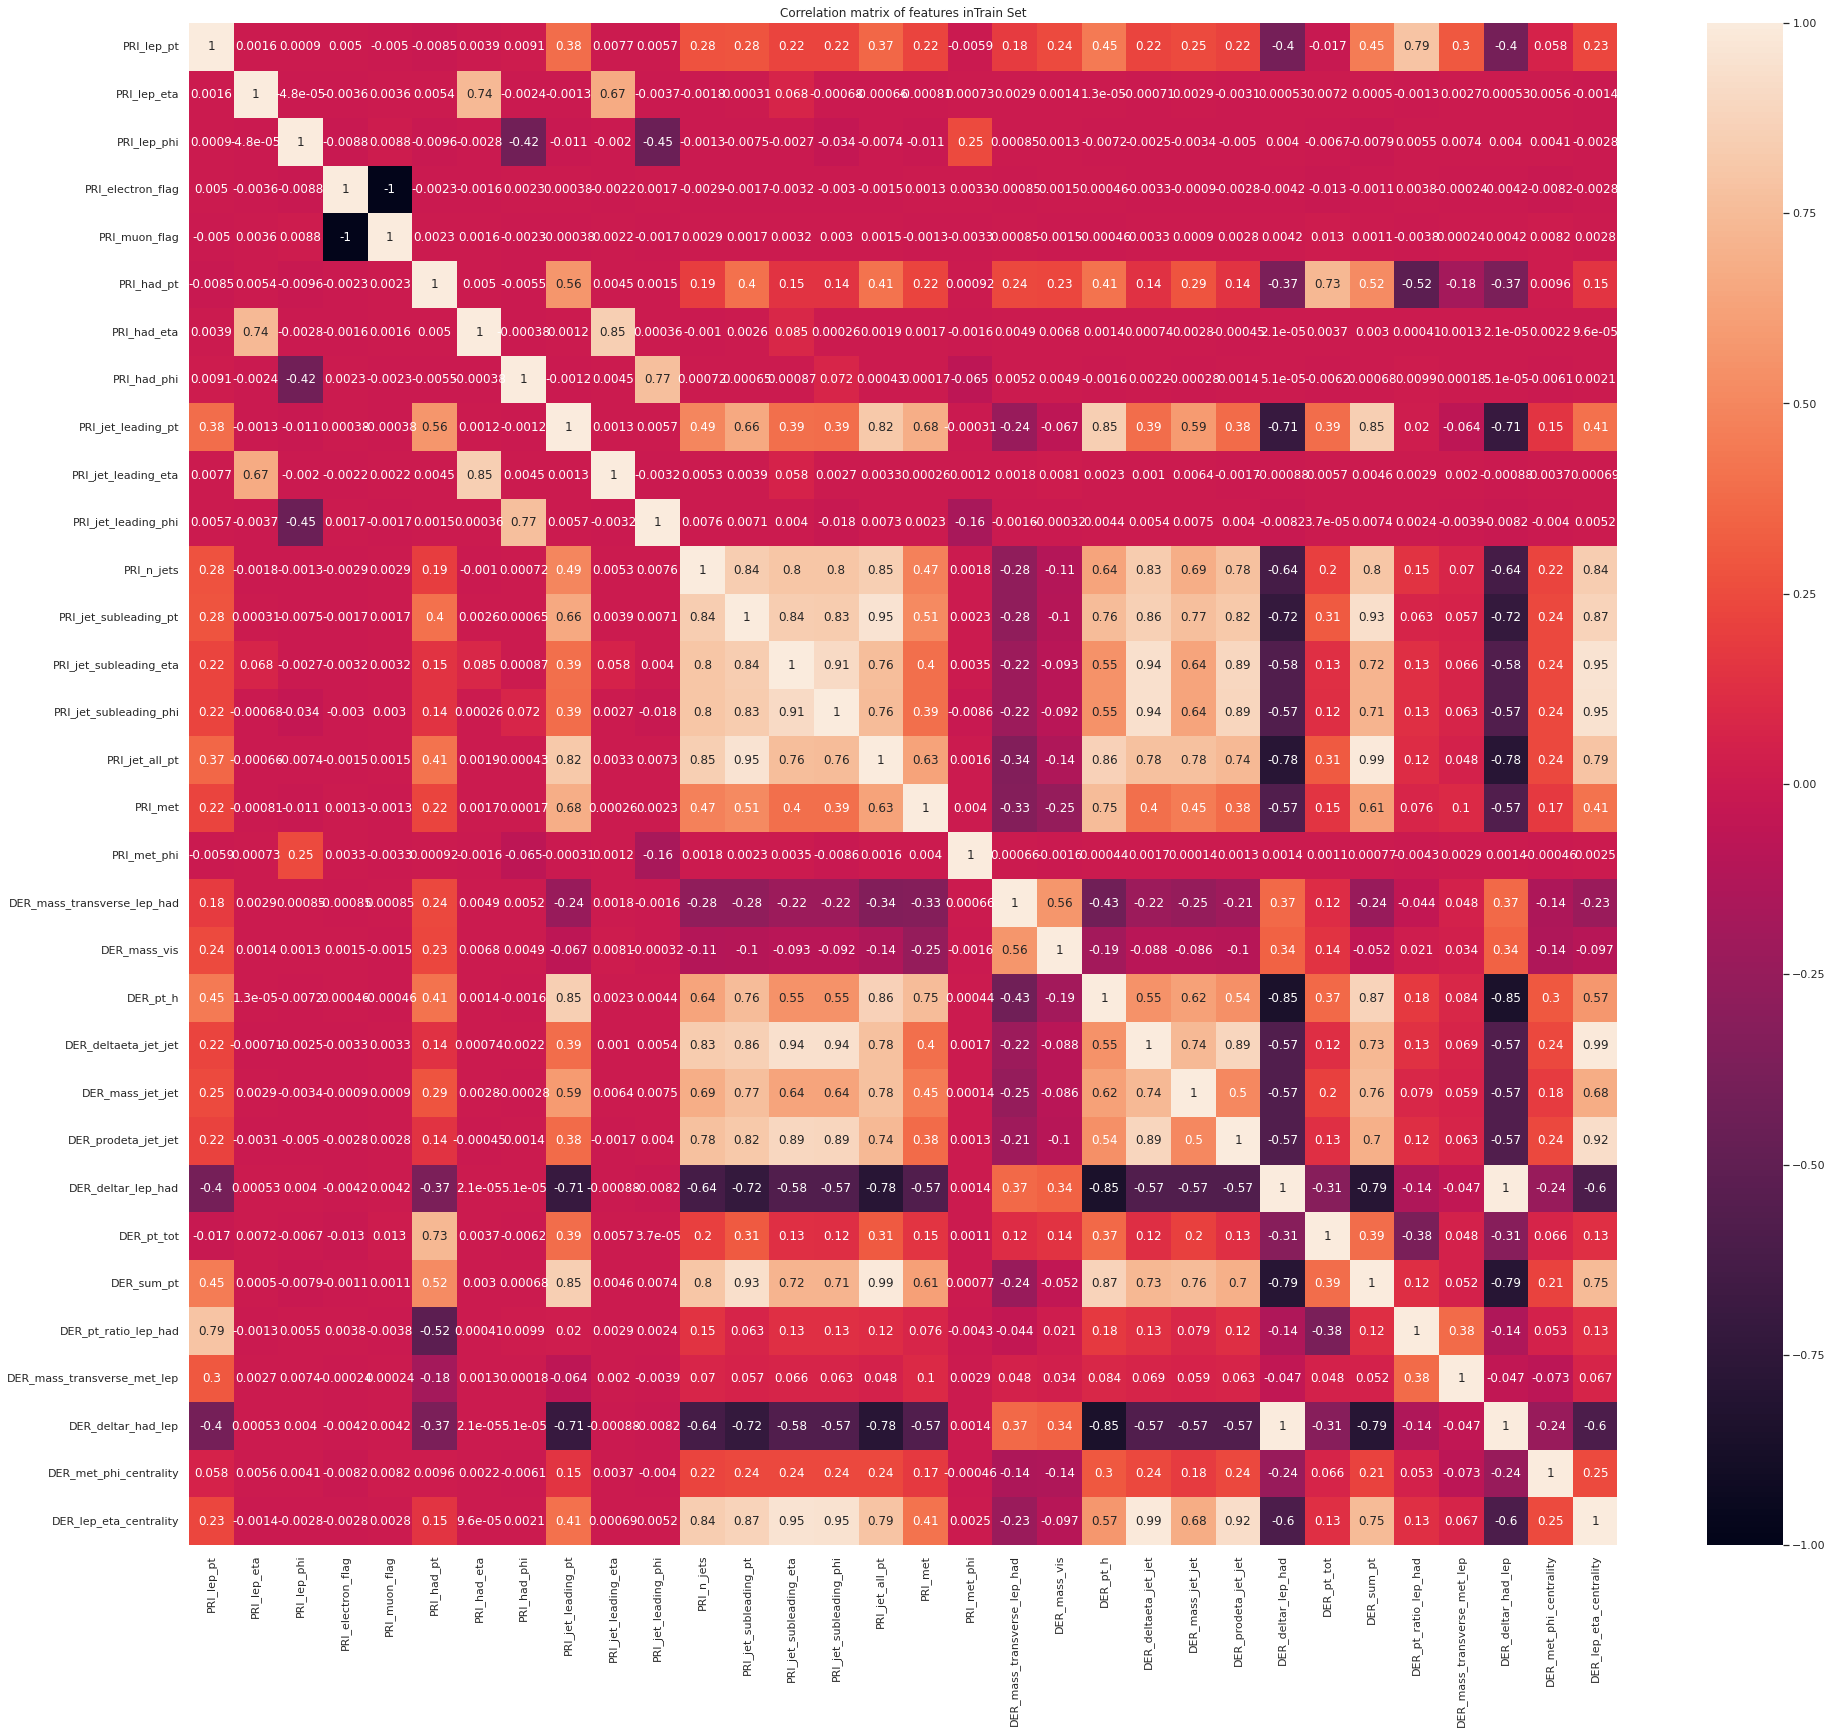

Background feature  correlation matrix


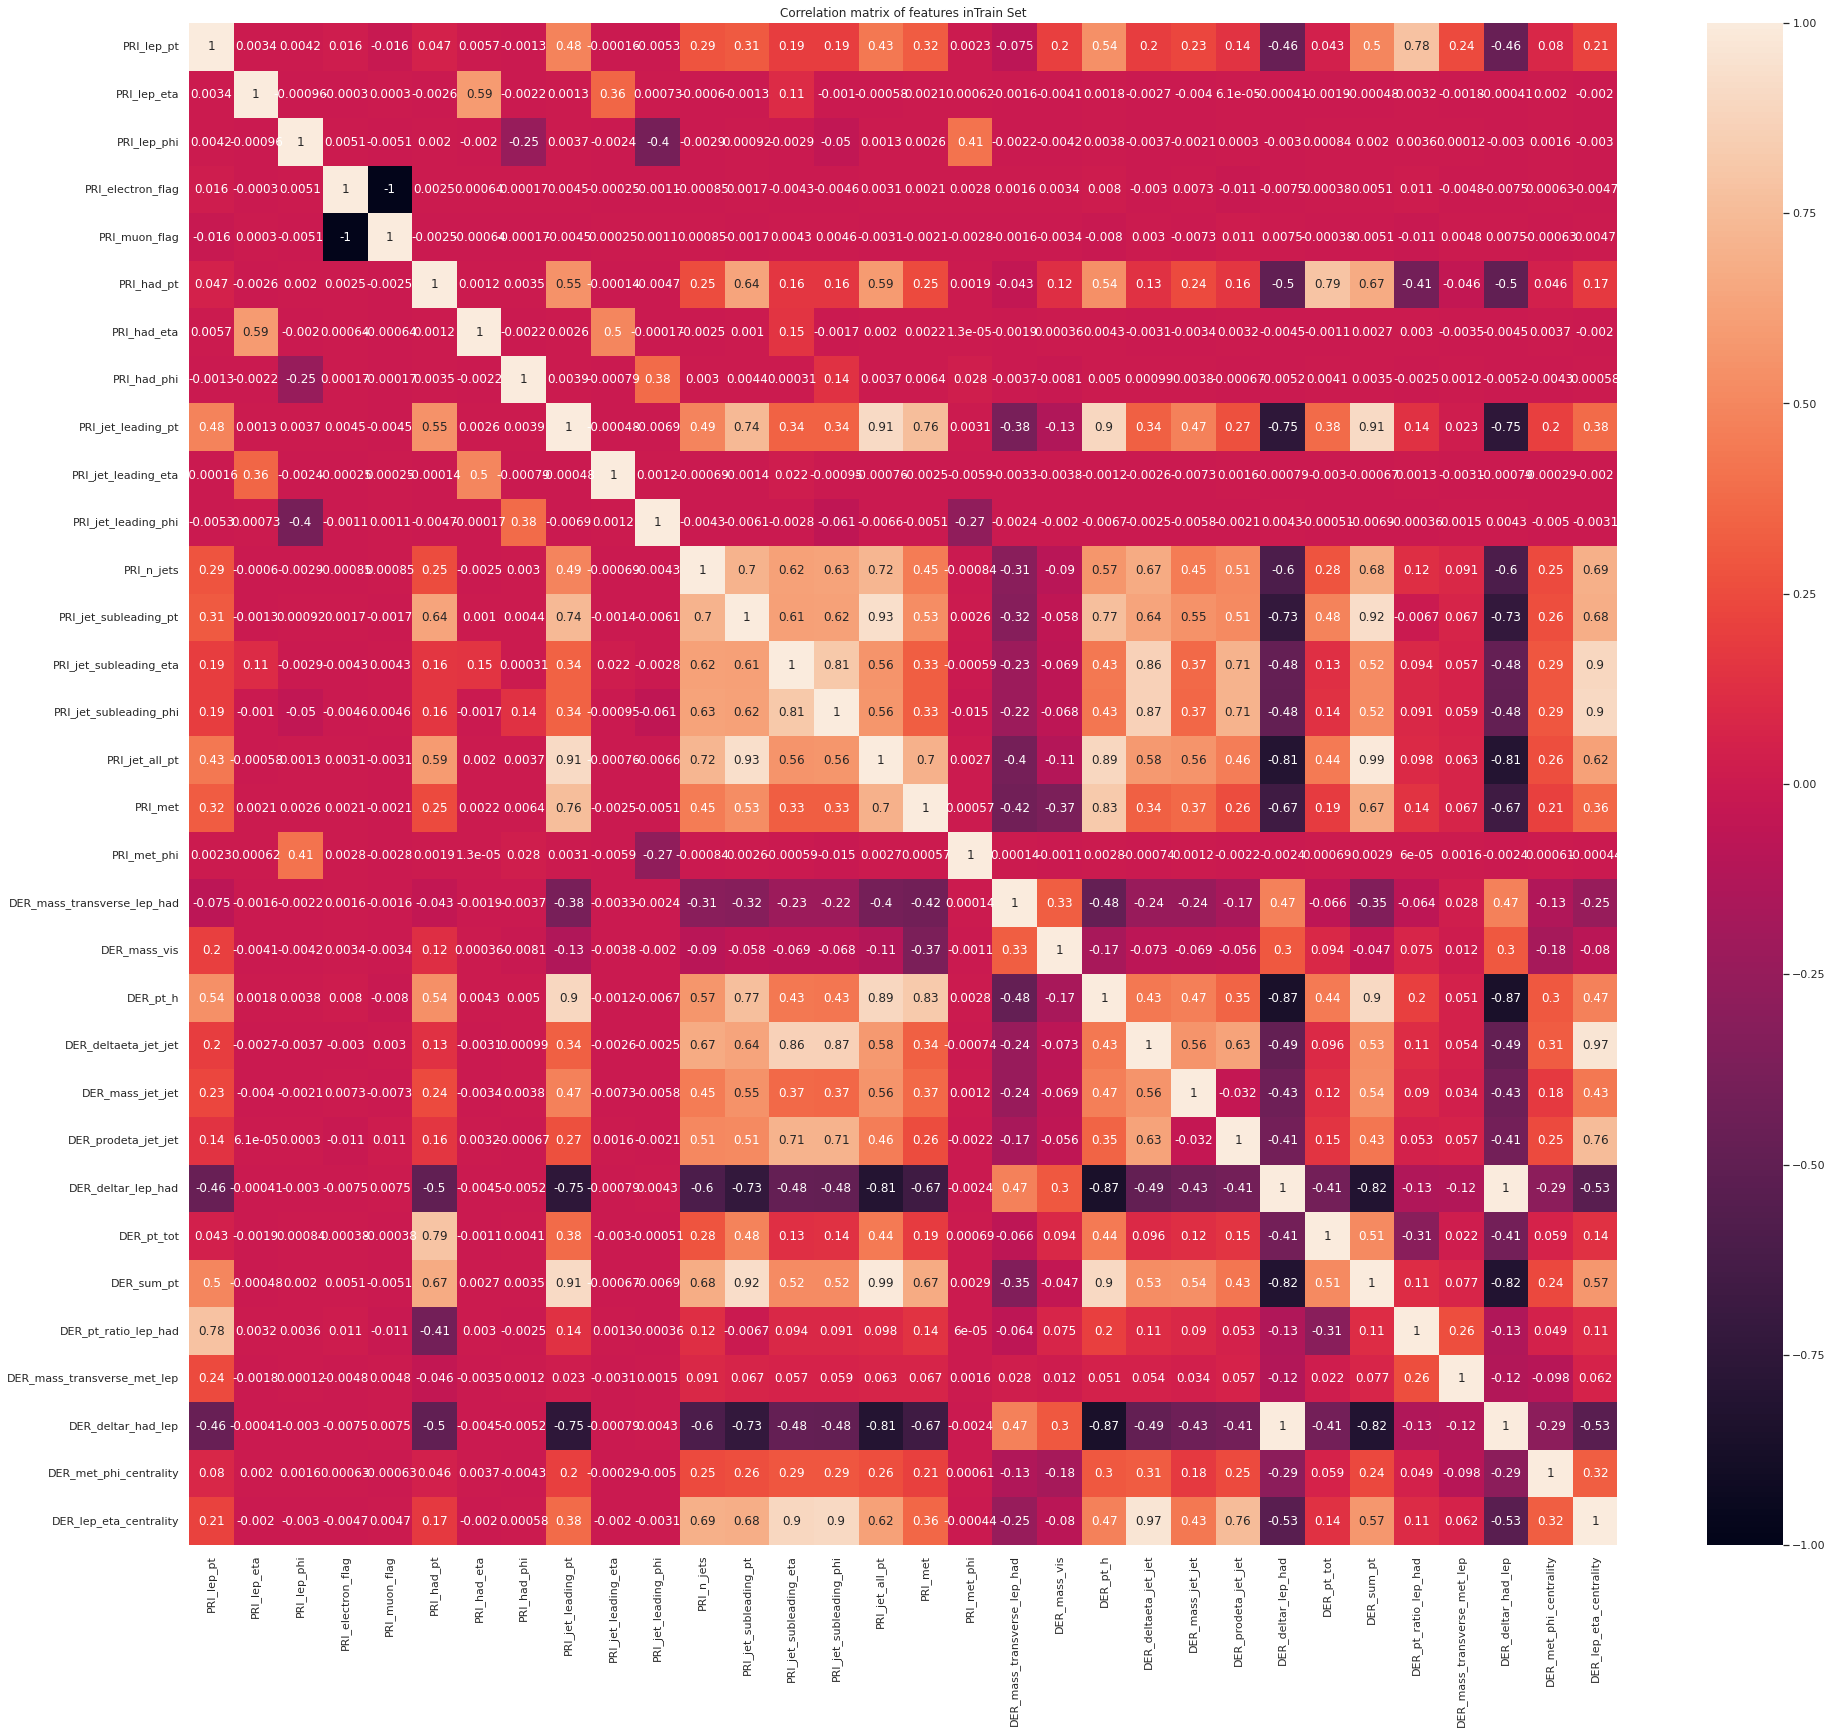

In [12]:
Train_data_vis.correlation_plots()

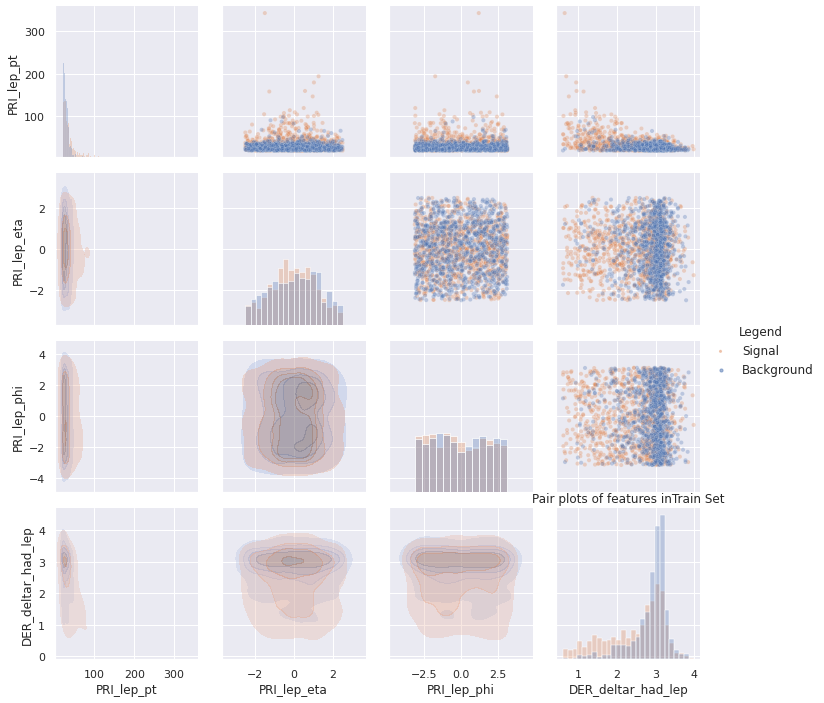

In [13]:
Train_data_vis.pair_plots(columns = ['PRI_lep_pt', 'PRI_lep_eta','PRI_lep_phi', 'DER_deltar_had_lep'])
 

In [14]:
# Train_data_vis.cluster_plot(columns = ['PRI_lep_pt', 'PRI_lep_eta','PRI_lep_phi', 'DER_deltar_had_lep'])

In [15]:
# n = 1
# for i in range(n):
#     Test_data_vis = Dataset_visualise(ingestion.test_sets[i],ingestion.test_sets_weights[i],ingestion.test_labels[i],f"Test Set {i} ")
#     Test_data_vis.examine_dataset()
#     Test_data_vis.histogram_dataset()
#     Test_data_vis.correlation_plots()
#     Test_data_vis.pair_plots()
 

## Training Model

In [16]:
# Initialize submission
ingestion.initialize_submission()

# Call fit method of submission
ingestion.fit_submission()


model = ingestion.model

[*] Initializing submitted model
[*] Calling fit method of submitted model
[*] - Generating Validation sets
Tau energy rescaling : 0.97
[*] - Intialize BDT
[*] - Train Neural Network
[*] - Intialize BDT
[*] --- Training Model
[*] --- Fitting Model
sum of signal 2860861.8102000016
sum of background 2860861.810200001
[0]	validation_0-logloss:0.60261	validation_0-auc:0.83759	validation_1-logloss:0.61380	validation_1-auc:0.68076
[1]	validation_0-logloss:0.55362	validation_0-auc:0.84677	validation_1-logloss:0.63635	validation_1-auc:0.41316
[2]	validation_0-logloss:0.52453	validation_0-auc:0.85024	validation_1-logloss:0.63678	validation_1-auc:0.41338
[3]	validation_0-logloss:0.50580	validation_0-auc:0.85314	validation_1-logloss:0.63854	validation_1-auc:0.59163
[4]	validation_0-logloss:0.49332	validation_0-auc:0.85521	validation_1-logloss:0.66185	validation_1-auc:0.58991
[5]	validation_0-logloss:0.48493	validation_0-auc:0.85712	validation_1-logloss:0.64973	validation_1-auc:0.58987
[6]	validat

[70]	validation_0-logloss:0.41048	validation_0-auc:0.89431	validation_1-logloss:2.77221	validation_1-auc:0.53915
[71]	validation_0-logloss:0.41006	validation_0-auc:0.89457	validation_1-logloss:2.73627	validation_1-auc:0.53829
[72]	validation_0-logloss:0.40966	validation_0-auc:0.89478	validation_1-logloss:2.74098	validation_1-auc:0.51657
[73]	validation_0-logloss:0.40879	validation_0-auc:0.89533	validation_1-logloss:2.75469	validation_1-auc:0.51683
[74]	validation_0-logloss:0.40825	validation_0-auc:0.89561	validation_1-logloss:2.60870	validation_1-auc:0.51749
[75]	validation_0-logloss:0.40766	validation_0-auc:0.89597	validation_1-logloss:2.59543	validation_1-auc:0.51674
[76]	validation_0-logloss:0.40692	validation_0-auc:0.89641	validation_1-logloss:2.59367	validation_1-auc:0.51958
[77]	validation_0-logloss:0.40616	validation_0-auc:0.89689	validation_1-logloss:2.59588	validation_1-auc:0.51946
[78]	validation_0-logloss:0.40580	validation_0-auc:0.89708	validation_1-logloss:2.54984	validati

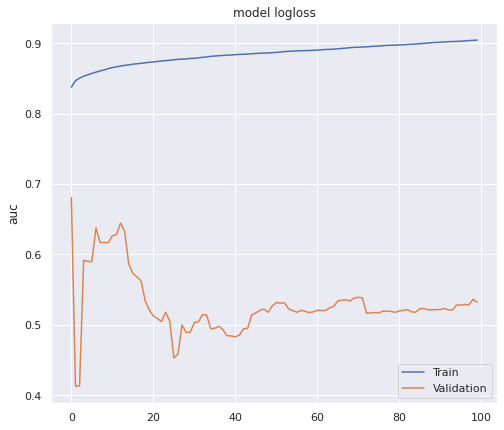

In [17]:
results = model.model.evals_result()

validationcurve(results,'auc')

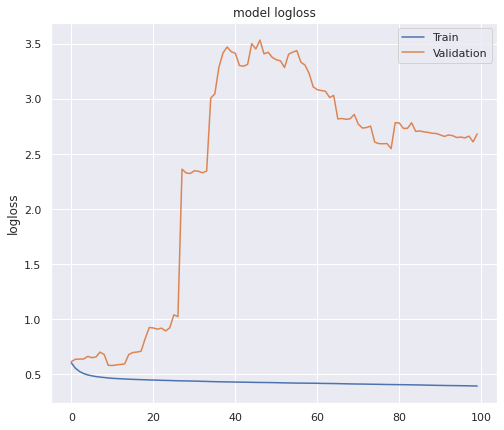

In [18]:
validationcurve(results,'logloss')

In [19]:
# lgb.plot_metric(results)

In [20]:
# Call predict method of submission
ingestion.predict_submission()

model = ingestion.model

[*] Calling predict method of submitted model
[*] - Testing
[*] - Computing Test result

[*] --- AUC test : 0.8564750517068204
[*] --- total weight test: 2871156.1554242056
[*] --- total weight train: 2870527.8620537156
[*] --- total weight mu_cals_set: 2870527.8620537138
[*] --- total test signal : 10294.345224205412
[*] --- total test background train: 2860861.8102
[*] --- Significance : 17.38863950523184
[*] --- delta_mu_stat : 0.057508811986074194
[*] --- mean N: 43144.6311 --- sigma N: 207.9624134616397
[*] --- signal: 3523.3435682263835 --- background: 40953.54100655988
[*] --- signal test: 3611.8620233736406 --- background test: 39533.19974634096 --- N_roi 43144.6311

[*] --- mu hat test :0.6218780686616647 + 0.6809022340416889 - 0.5628539032816404

[*] --- AUC test : 0.857050685023043
[*] --- total weight test: 2876327.493165943
[*] --- total weight train: 2870527.8620537156
[*] --- total weight mu_cals_set: 2870527.8620537138
[*] --- total test signal : 15465.682965942406
[*] 

## Visualise Model

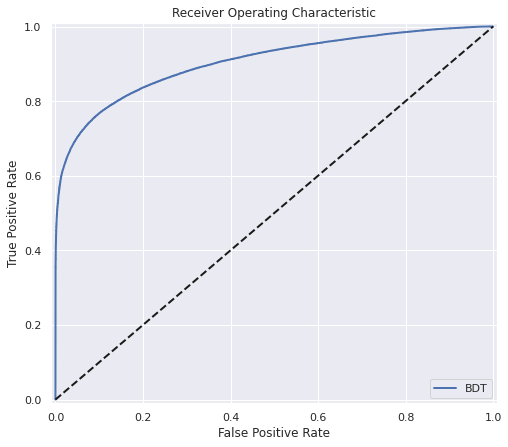

<Figure size 576x504 with 0 Axes>

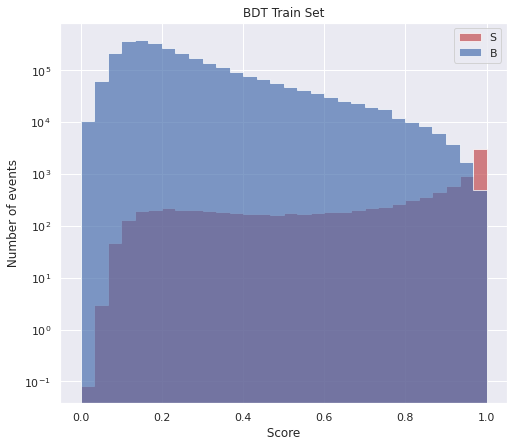

<Figure size 576x504 with 0 Axes>

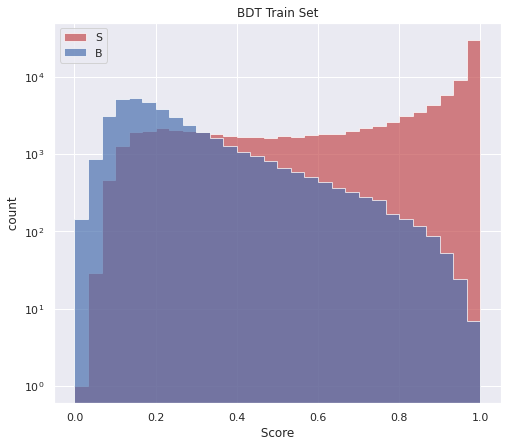

In [21]:
roc_curve_(model.train_set['score'],model.train_set['labels'] ,model.train_set['weights'],plot_label = model.model_name,color='b',lw = 2)

events_histogram(model.train_set['score'],model.train_set['labels'] ,model.train_set['weights'],plot_label = model.model_name + " Train Set")

score_histogram(model.train_set['score'],model.train_set['labels'] ,plot_label = model.model_name + " Train Set")


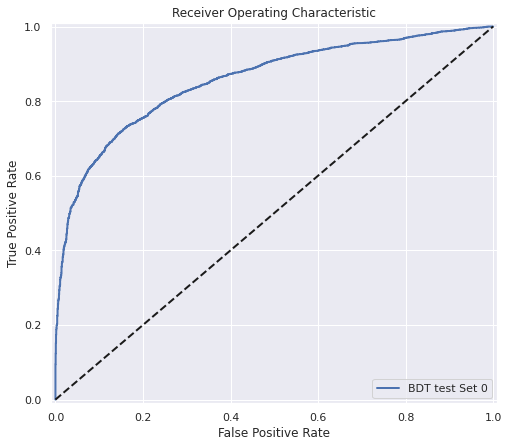

<Figure size 576x504 with 0 Axes>

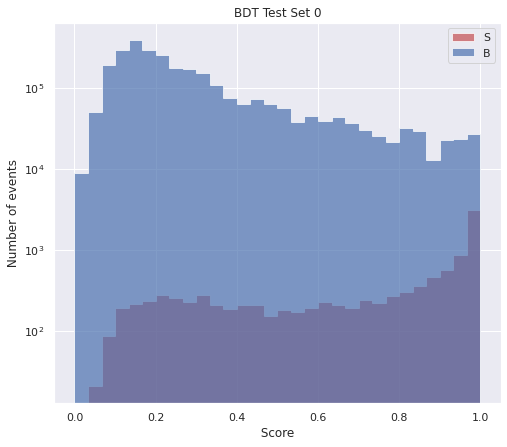

<Figure size 576x504 with 0 Axes>

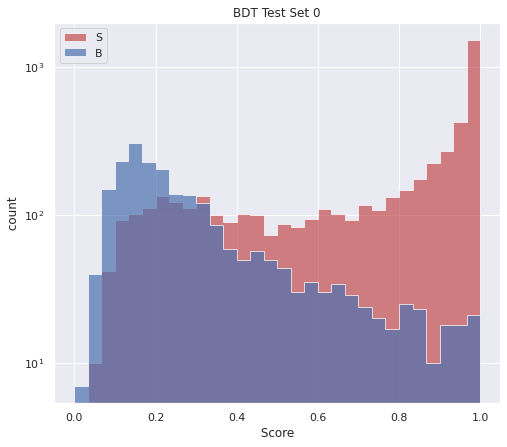

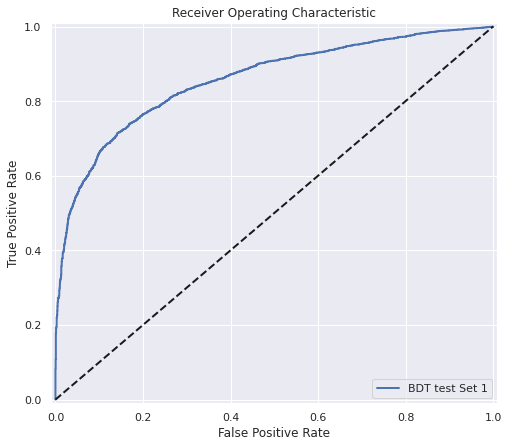

<Figure size 576x504 with 0 Axes>

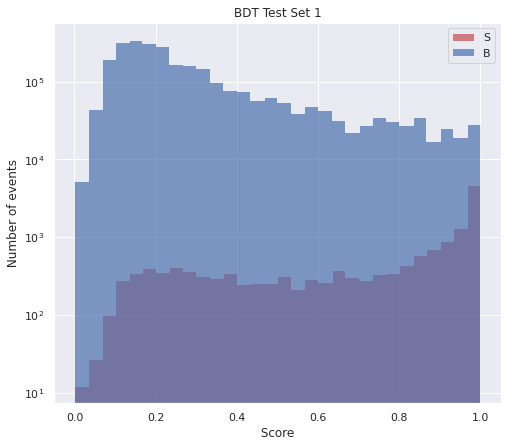

<Figure size 576x504 with 0 Axes>

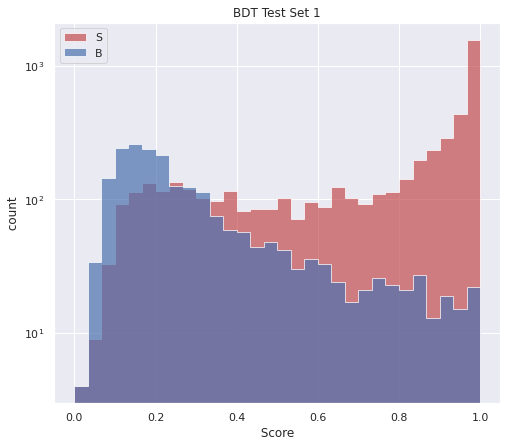

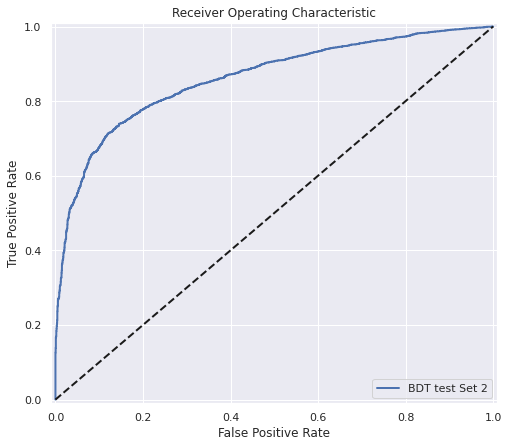

<Figure size 576x504 with 0 Axes>

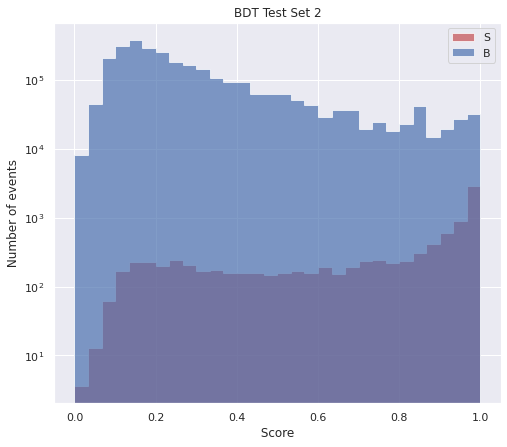

<Figure size 576x504 with 0 Axes>

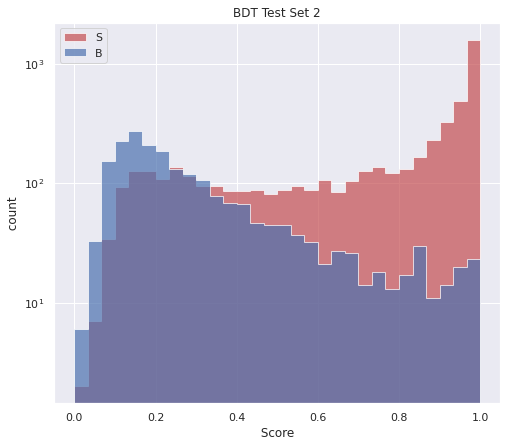

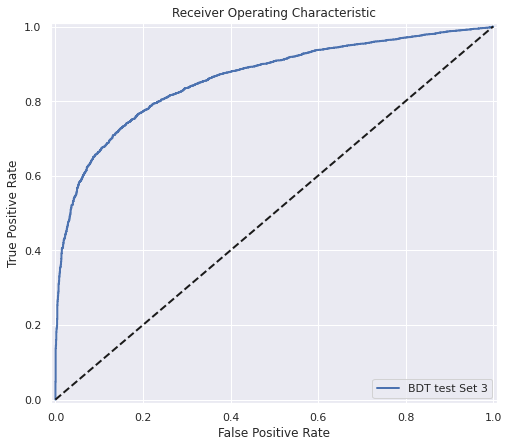

<Figure size 576x504 with 0 Axes>

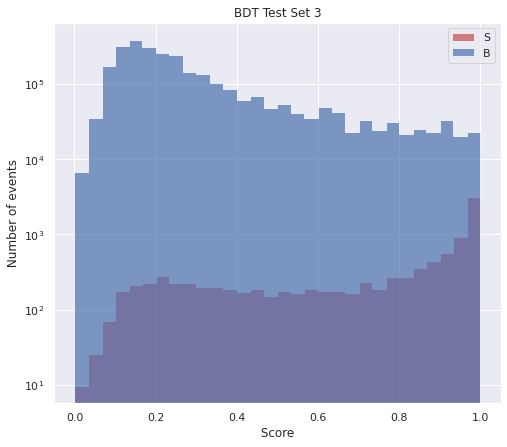

<Figure size 576x504 with 0 Axes>

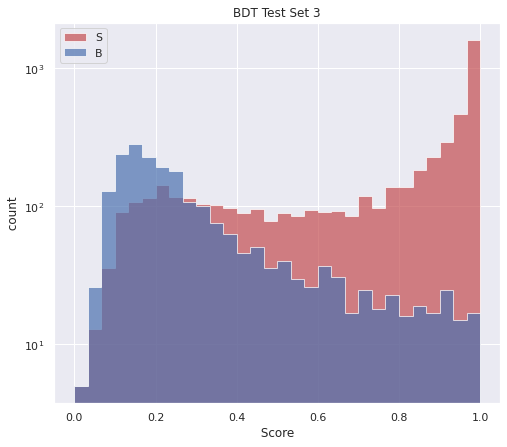

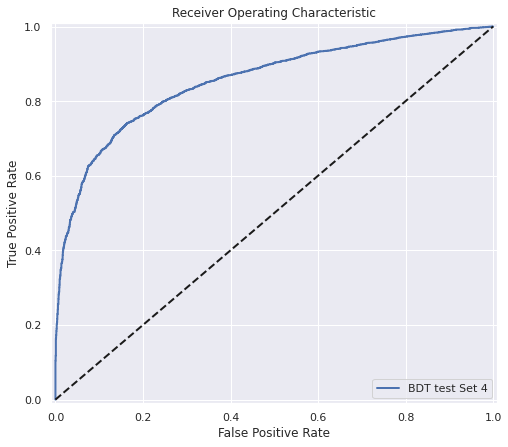

<Figure size 576x504 with 0 Axes>

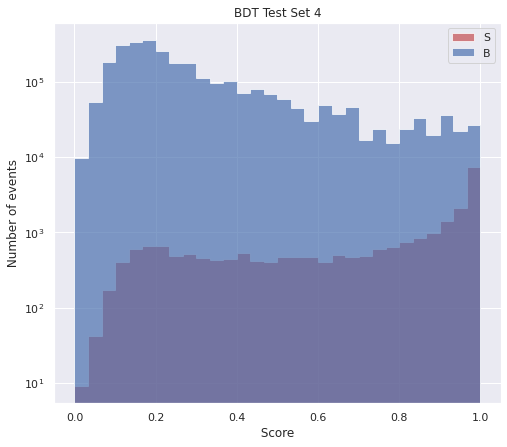

<Figure size 576x504 with 0 Axes>

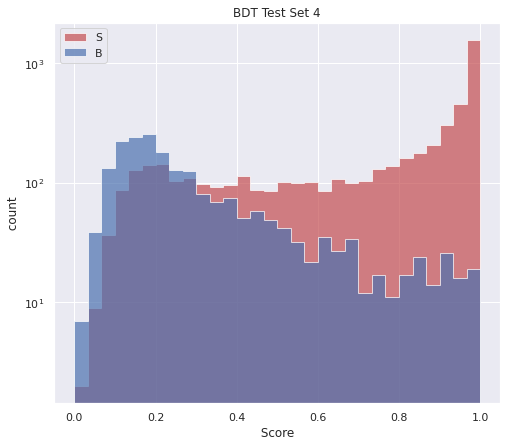

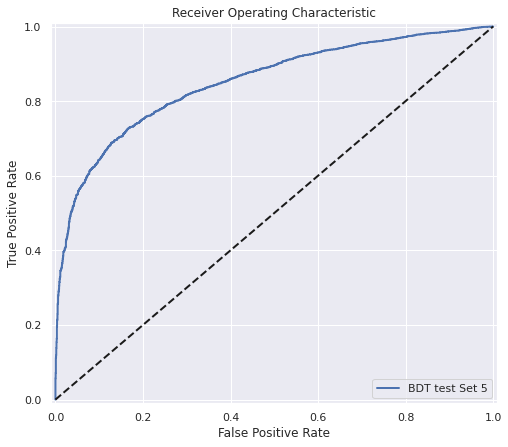

<Figure size 576x504 with 0 Axes>

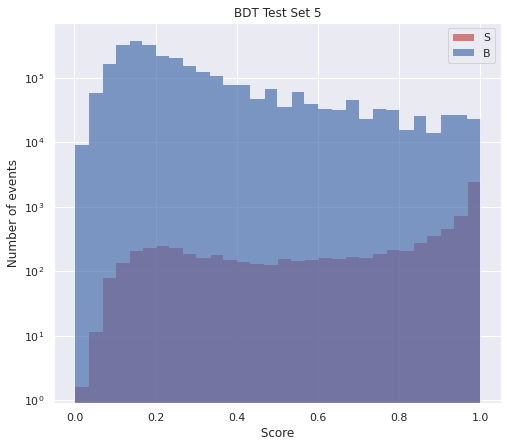

<Figure size 576x504 with 0 Axes>

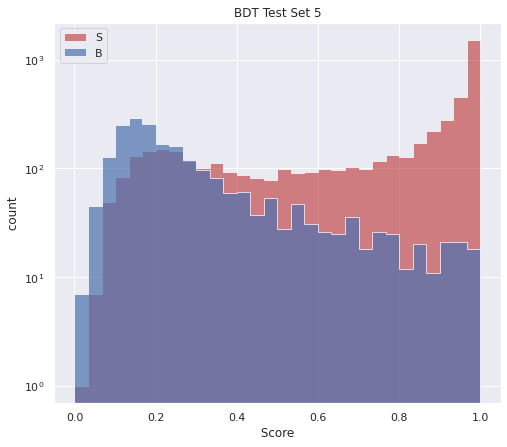

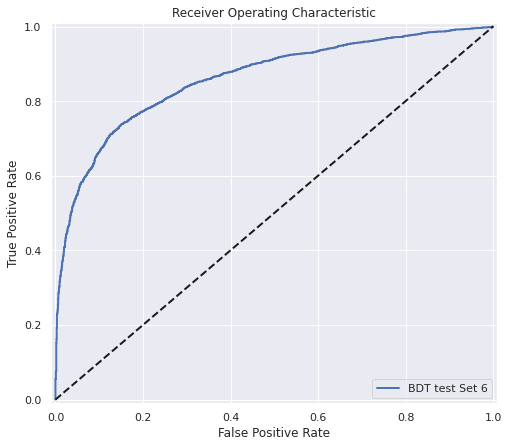

<Figure size 576x504 with 0 Axes>

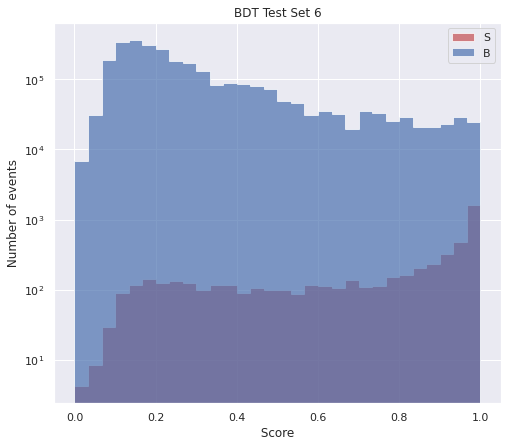

<Figure size 576x504 with 0 Axes>

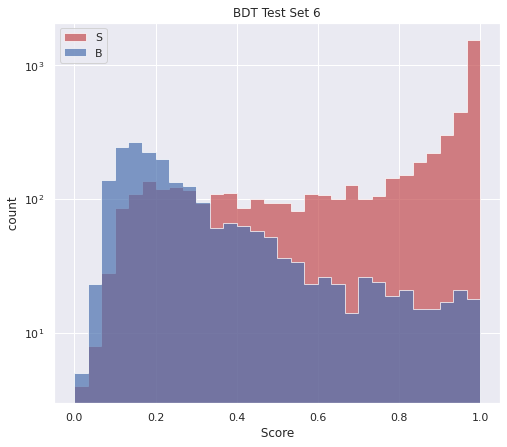

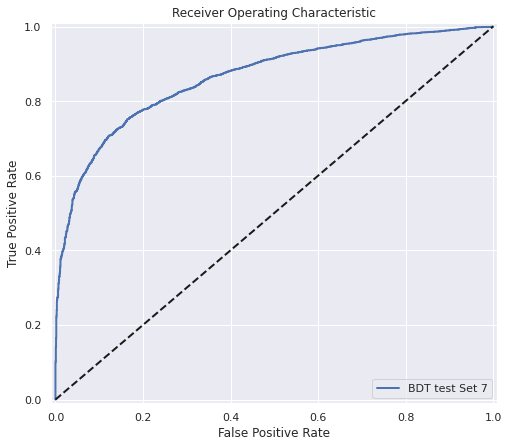

<Figure size 576x504 with 0 Axes>

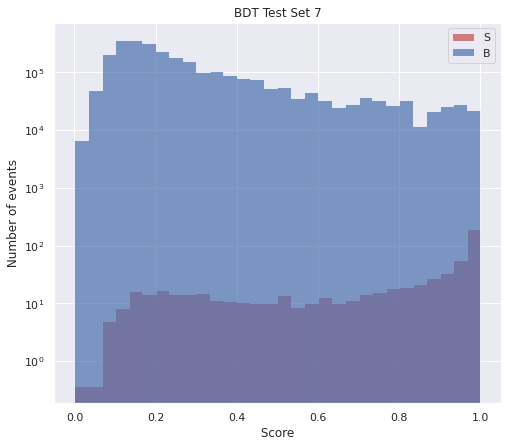

<Figure size 576x504 with 0 Axes>

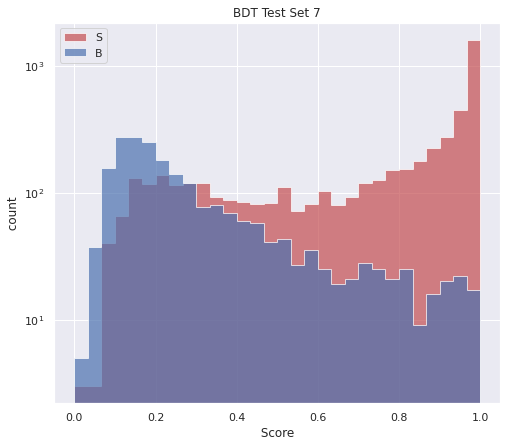

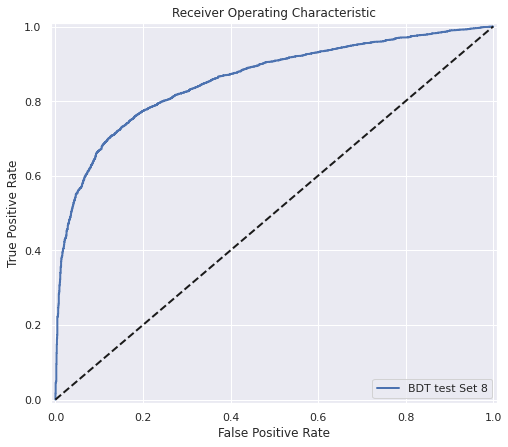

<Figure size 576x504 with 0 Axes>

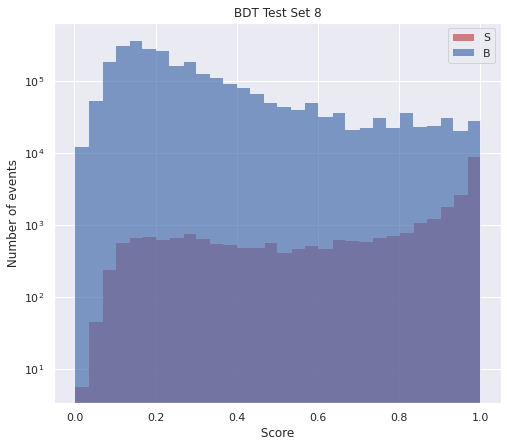

<Figure size 576x504 with 0 Axes>

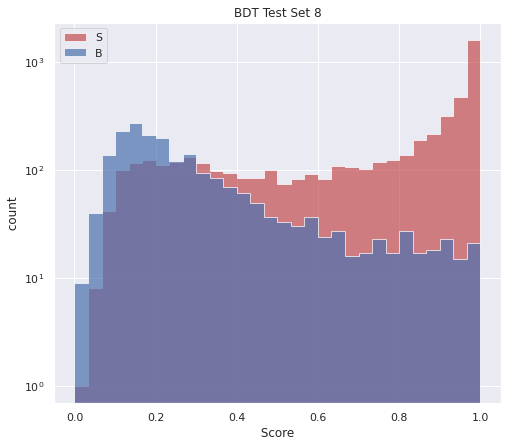

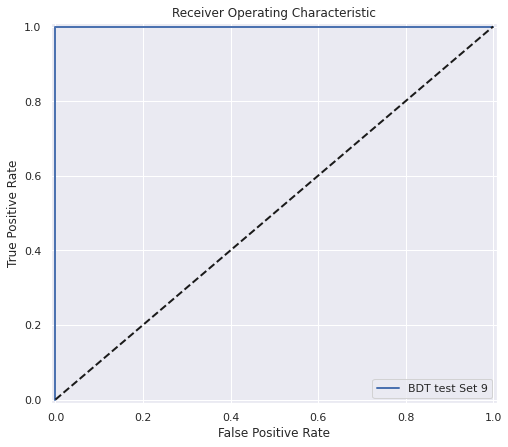

<Figure size 576x504 with 0 Axes>

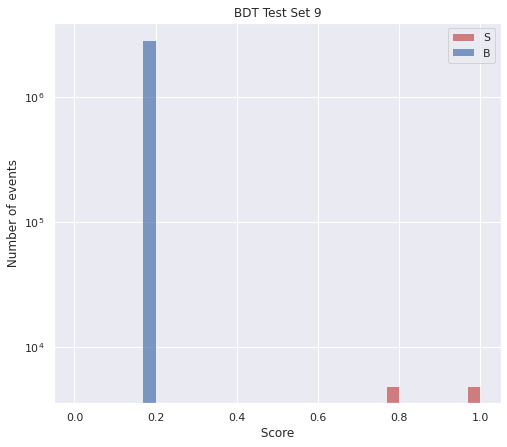

<Figure size 576x504 with 0 Axes>

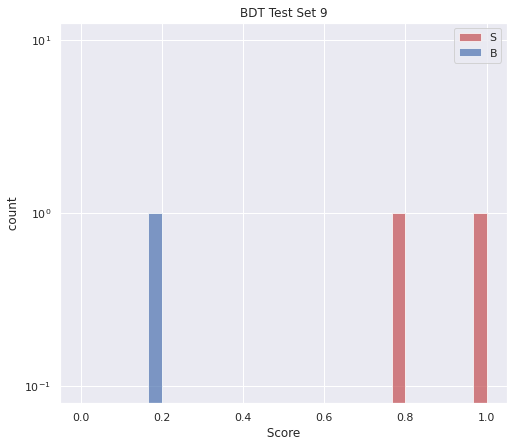

In [22]:
i = 0
for test_set in model.test_sets:
    roc_curve_(test_set['score'],test_set['labels'] ,test_set['weights'],plot_label = model.model_name + f" test Set {i}",color='b',lw = 2)

    events_histogram(test_set['score'],test_set['labels'] ,test_set['weights'],plot_label = model.model_name + f" Test Set {i}")

    score_histogram(test_set['score'],test_set['labels'] ,plot_label = model.model_name + f" Test Set {i}")
    i = i + 1

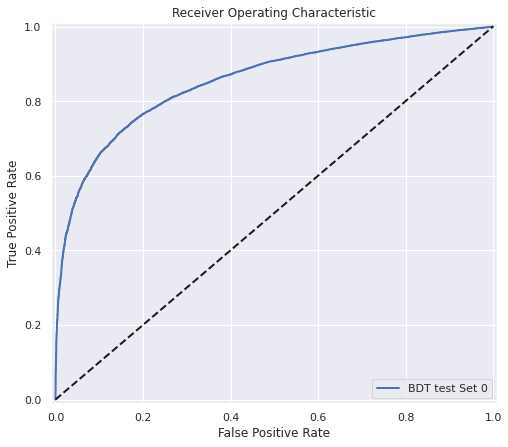

<Figure size 576x504 with 0 Axes>

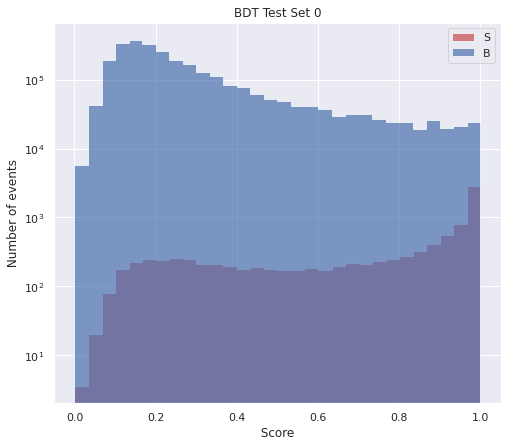

<Figure size 576x504 with 0 Axes>

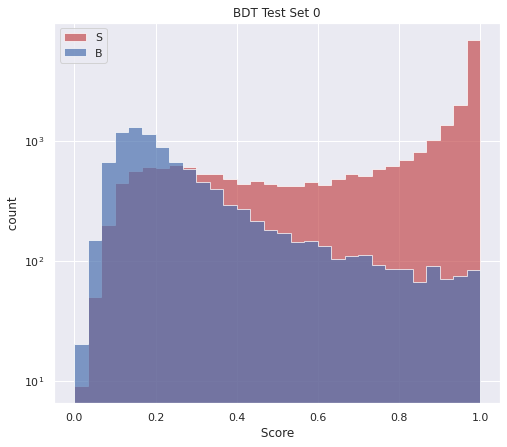

In [23]:
i = 0
for valid_set in model.validation_sets:
    roc_curve_(valid_set['score'],valid_set['labels'] ,valid_set['weights'],plot_label = model.model_name + f" test Set {i}",color='b',lw = 2)

    events_histogram(valid_set['score'],valid_set['labels'] ,valid_set['weights'],plot_label = model.model_name + f" Test Set {i}")

    score_histogram(valid_set['score'],valid_set['labels'] ,plot_label = model.model_name + f" Test Set {i}")
    i = i + 1

In [24]:
# Save result
ingestion.save_result()

# Stop timer
ingestion.stop_timer()

# Show duration
ingestion.show_duration()

[*] Saving result
[*] --- delta_mu_hat: [11.564463642019776, 11.564367547789045, 11.56313099166771, 11.567237625168172, 11.561742128663184, 11.568623351767869, 11.566768780469253, 11.571897506504113, 11.561692490870596, 11.603803764340253]
[*] --- mu_hats (avg): -0.7766766463644655

---------------------------------
[✔] Total duration: 0:03:07.865603
---------------------------------


## End